In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

In [32]:
df = pd.read_csv('data.csv')

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [33]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Diabetes_012 3
HighBP 2
HighChol 2
CholCheck 2
BMI 84
Smoker 2
Stroke 2
HeartDiseaseorAttack 2
PhysActivity 2
Fruits 2
Veggies 2
HvyAlcoholConsump 2
AnyHealthcare 2
NoDocbcCost 2
GenHlth 5
MentHlth 31
PhysHlth 31
DiffWalk 2
Sex 2
Age 13
Education 6
Income 8


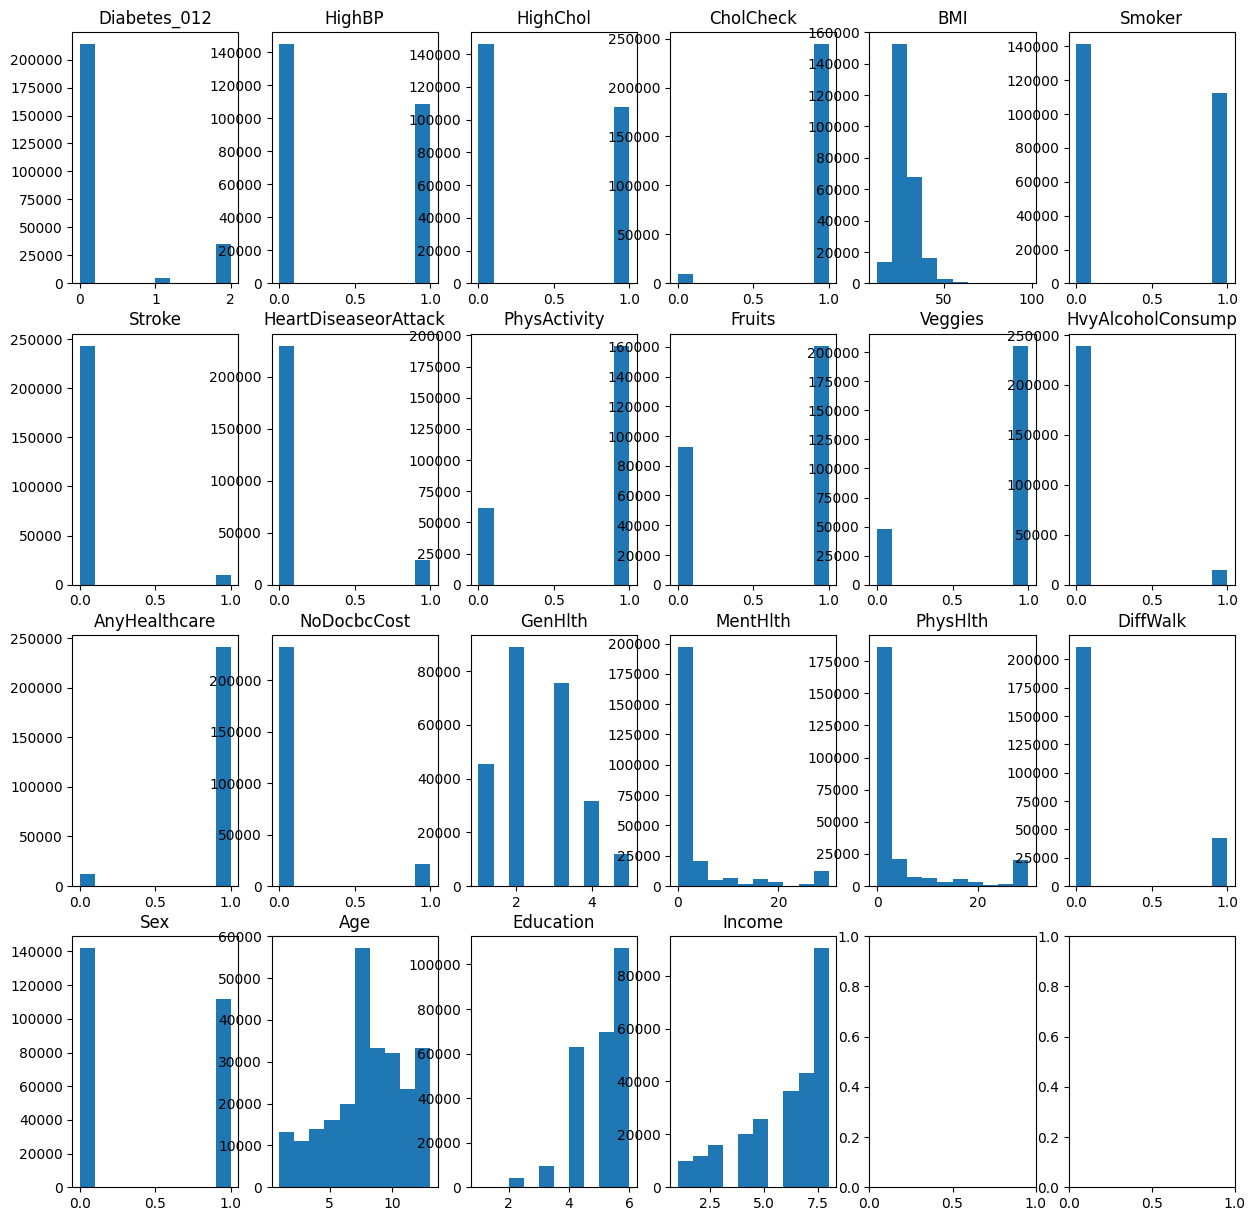

In [34]:
fig, axes = plt.subplots(4, 6)

axes = axes.flatten()

for idx, col in enumerate(df):
    nu = len(df[col].unique())
    print(col, nu)

    axes[idx].hist(df[col])
    axes[idx].set_title(col)

fig.set_size_inches((15, 15))

In [ ]:
non_cat = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income']

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [43]:
X_train_cat = X_train.drop(non_cat, axis=1)
oh_encoder = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='infrequent_if_exist').fit(X_train_cat)
oh_X_train_cat = pd.DataFrame(oh_encoder.transform(X_train_cat), columns=oh_encoder.get_feature_names_out())

X_train_num = X_train[non_cat]
std_scaler = StandardScaler().fit(X_train_num)
sc_X_train_num = pd.DataFrame(std_scaler.transform(X_train_num), columns=std_scaler.get_feature_names_out())

pr_X_train = pd.concat([oh_X_train_cat, sc_X_train_num], axis=1)
pr_X_train

,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,...,Education_2.0,Education_3.0,Education_4.0,Education_5.0,Education_6.0,BMI,MentHlth,PhysHlth,Age,Income
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.661947,-0.430043,-0.257937,0.644643,0.940179
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.208345,0.915772,-0.487071,-0.665193,-0.989480
2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.396458,-0.430043,-0.487071,0.317184,0.940179
3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.813147,-0.026299,-0.487071,-0.337734,0.940179
4,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.001260,0.242864,-0.487071,-0.337734,0.940179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190255,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.513266,1.588679,-0.487071,-0.992652,-2.436724
190256,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.094057,-0.430043,-0.487071,0.972102,0.457764
190257,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.510746,-0.430043,-0.143370,0.317184,0.940179
190258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.813147,-0.430043,-0.487071,-0.992652,-0.024651


In [48]:
def preprocess(data, cat_pr, num_pr, num_features_cols):
    data_cat = data.drop(num_features_cols, axis=1)
    oh_data_cat = pd.DataFrame(cat_pr.transform(data_cat), columns=cat_pr.get_feature_names_out())

    data_num = data[num_features_cols]
    sc_data_num = pd.DataFrame(num_pr.transform(data_num), columns=num_pr.get_feature_names_out())

    pr_data = pd.concat([oh_data_cat, sc_data_num], axis=1)
    return pr_data

pr_X_test = preprocess(X_test, oh_encoder, std_scaler, non_cat)

In [45]:
from joblib import dump

dump(oh_encoder, 'cat.prep')
dump(std_scaler, 'num.prep')

['num.prep']

In [49]:
clf = LogisticRegression(n_jobs=-1).fit(pr_X_train, y_train)

y_pred = clf.predict(pr_X_test)

In [50]:
f1_score(y_test, y_pred, average='micro')

0.8489593188268685

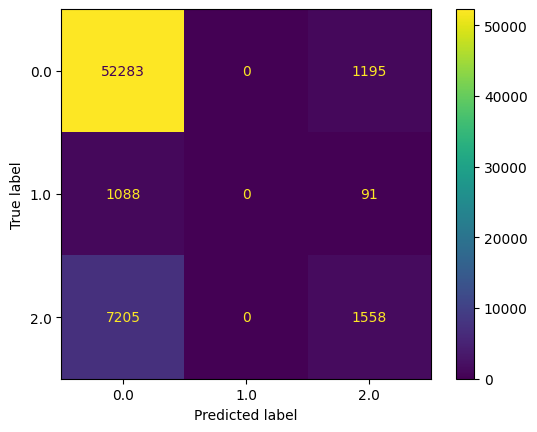

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [52]:
clf = CatBoostClassifier(1000)
clf.fit(pr_X_train, y_train, early_stopping_rounds=100)

y_pred = clf.predict(pr_X_test)

Learning rate set to 0.103412
0:	learn: 0.9717782	total: 46.4ms	remaining: 46.4s
1:	learn: 0.8766695	total: 73.2ms	remaining: 36.5s
2:	learn: 0.8018421	total: 107ms	remaining: 35.5s
3:	learn: 0.7414784	total: 142ms	remaining: 35.3s
4:	learn: 0.6924026	total: 173ms	remaining: 34.4s
5:	learn: 0.6516384	total: 206ms	remaining: 34.1s
6:	learn: 0.6171335	total: 263ms	remaining: 37.3s
7:	learn: 0.5873707	total: 338ms	remaining: 41.9s
8:	learn: 0.5617488	total: 387ms	remaining: 42.6s
9:	learn: 0.5404627	total: 417ms	remaining: 41.3s
10:	learn: 0.5222648	total: 444ms	remaining: 39.9s
11:	learn: 0.5061576	total: 471ms	remaining: 38.8s
12:	learn: 0.4919945	total: 501ms	remaining: 38s
13:	learn: 0.4802046	total: 528ms	remaining: 37.2s
14:	learn: 0.4699261	total: 561ms	remaining: 36.8s
15:	learn: 0.4610545	total: 587ms	remaining: 36.1s
16:	learn: 0.4527403	total: 615ms	remaining: 35.6s
17:	learn: 0.4456292	total: 644ms	remaining: 35.2s
18:	learn: 0.4396566	total: 672ms	remaining: 34.7s
19:	learn: 

In [53]:
f1_score(y_test, y_pred, average='micro')

0.8498580889309366

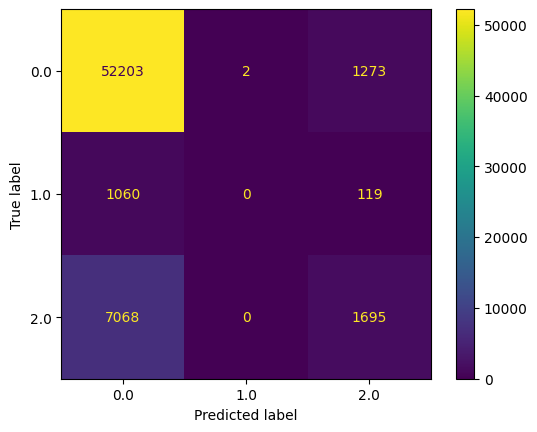

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [55]:
clf.save_model('catboost.model')